In [ ]:
from torchvision.models import resnet18, GoogLeNet, list_models, get_model
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)


100%|██████████| 9912422/9912422 [00:00<00:00, 143548164.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121135693.82it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 94317041.66it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20418573.17it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root='./data', train=True, transform=trans, download=True)
test_set = dset.MNIST(root='./data', train=False, transform=trans, download=True)
batch_size = 32


train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=batch_size,shuffle=False)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num=10):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=2),
            nn.Conv2d(64, 96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(96, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=2, stride=1),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(32*12*12,2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048,1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024,num),

        )

    def forward(self, x):

        x = self.feature(x)
        x = x.view(-1,32*12*12)
        x = self.classifier(x)
        return x

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
#         loss = F.nll_loss(output, target)
        loss = F.cross_entropy(output, target)
        train_losses.append(loss.data)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('\rEpoch: {} {:.0f}%\t     Loss: {:.6f}'.format(
                epoch,
                100. * batch_idx / len(train_loader), loss.data), end='')

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc=100. * float(correct.to(torch.device('cpu')).numpy())
    print('\nTest result: Average loss: {:.4f}, Accuracy: {:.4f}%\n'.format(
        test_loss, acc / len(test_loader.dataset)))

    test_accuracy.append(acc / len(test_loader.dataset))

Epoch: 1 96%	     Loss: 2.304236

<ipython-input-6-ab0e57baa3de>:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test result: Average loss: 2.3004, Accuracy: 11.3500%

Epoch: 2 96%	     Loss: 2.311497
Test result: Average loss: 2.2898, Accuracy: 11.3500%

Epoch: 3 96%	     Loss: 0.597424
Test result: Average loss: 0.1662, Accuracy: 94.2200%

Epoch: 4 96%	     Loss: 0.152441
Test result: Average loss: 0.0956, Accuracy: 96.6700%

Epoch: 5 96%	     Loss: 0.096001
Test result: Average loss: 0.0623, Accuracy: 97.9700%

Epoch: 6 96%	     Loss: 0.017914
Test result: Average loss: 0.0506, Accuracy: 98.2400%

Epoch: 7 96%	     Loss: 0.079486
Test result: Average loss: 0.0430, Accuracy: 98.6400%

Epoch: 8 96%	     Loss: 0.138648
Test result: Average loss: 0.0381, Accuracy: 98.8300%

Epoch: 9 96%	     Loss: 0.003320
Test result: Average loss: 0.0355, Accuracy: 98.9000%

Epoch: 10 96%	     Loss: 0.062519
Test result: Average loss: 0.0353, Accuracy: 98.9000%

Epoch: 11 96%	     Loss: 0.169284
Test result: Average loss: 0.0317, Accuracy: 98.9800%

Epoch: 12 96%	     Loss: 0.041168
Test result: Average loss: 0

TypeError: ignored

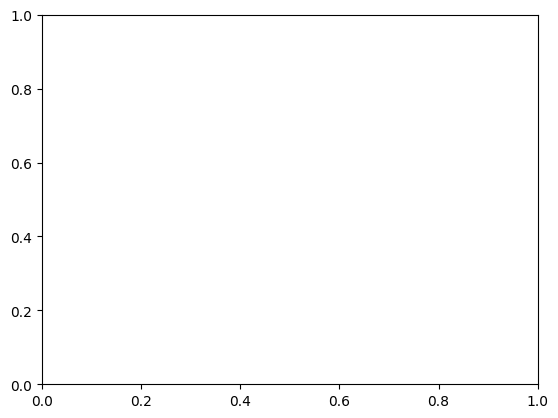

In [ ]:
model = AlexNet()
if torch.cuda.is_available():
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01)


train_losses = []
test_losses =[]
test_accuracy = []
for epoch in range(1, 15):
    train(epoch)
    test()

# Functions graphed when not using gpu
plt.figure()
plt.plot(train_losses)
plt.title('train losses')
plt.xlabel('step')
plt.ylabel('percent')

plt.figure()
plt.plot(test_losses)
plt.title('test losses')
plt.xlabel('step')
plt.ylabel('percent')

plt.figure()
plt.plot(test_accuracy)
plt.title('test_accuracy')
plt.xlabel('step')
plt.ylabel('percent')


In [ ]:
#1:51:47 h:m:s 5:27 gpu
torch.save(model.state_dict(), './AlexModel')

In [ ]:
model = AlexNet()
model.load_state_dict(torch.load('/content/AlexModel'))
model.eval()

In [ ]:
def predict_img_class(img,model):
    """ Predict the class of image and Return Predicted Class"""
    img = img.unsqueeze(0)
    prediction =  model(img)
    softmaxEl = F.softmax(prediction, dim=1)
    pred = softmaxEl.max()
    copy = softmaxEl
    copy = copy.cpu().detach().numpy()
    # copy is in the form of [[1 2 3 ... 10]]
    new = copy[0]
    # new is in the form of [1 2 3 ... 10]
    outputs_arr.append(new)
    # allows use of log_loss function
    predLab = np.argmax(copy)
    pred_label[i] = predLab
    pred_labelscore[i] = pred
    _, preds = torch.max(prediction, dim = 1)
    return 'Done'

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=1,shuffle=False)

outputs_arr = []
pred_label = np.zeros(len(test_loader))
pred_labelscore = np.zeros(len(test_loader))
true_label = np.zeros(len(test_loader))
i = 0
model.eval()
for data, target in test_loader:
  predict_img_class(data[0], model)
  true_label[i] = target
  i = i+1

print(log_loss(true_label,outputs_arr))

In [ ]:
# 1:22 run time
newdf = np.zeros((len(test_loader),3))
for j in range(len(test_loader)):
  newdf[j][0] = true_label[j]
  newdf[j][1] = pred_label[j]
  newdf[j][2] = pred_labelscore[j]
df = pd.DataFrame(newdf)
df.to_excel('AlexNetExcelML.xlsx')